<a href="https://colab.research.google.com/github/2203A51819/Data_Analysis_Using_Python_3-1/blob/main/DAUP_Exam_2203A51819.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Define parameters
historical_lambda = 150
observed_mean = 198
observed_variance = 540
n_days = 30
n_simulations = 5000

print("Parameters and libraries initialized.")

Parameters and libraries initialized.


In [2]:
import numpy as np

# 1. Generate n_simulations * n_days random samples from a Poisson distribution with historical_lambda
simulated_data_flat = np.random.poisson(historical_lambda, n_simulations * n_days)

# 2. Reshape the 1D array into a 2D array of shape (n_simulations, n_days)
simulated_data = simulated_data_flat.reshape(n_simulations, n_days)

# 3. For each simulated 'month', calculate its mean
simulated_means = np.mean(simulated_data, axis=1)

# 4. For each simulated 'month', calculate its variance
simulated_variances = np.var(simulated_data, axis=1, ddof=1) # ddof=1 for sample variance

# 5. Calculate the proportion of values in simulated_means that are >= observed_mean
prop_mean_greater_equal_observed = (simulated_means >= observed_mean).mean()

# 6. Calculate the proportion of values in simulated_variances that are >= observed_variance
prop_variance_greater_equal_observed = (simulated_variances >= observed_variance).mean()

# 7. Print the calculated proportions
print(f"Proportion of simulated months where mean >= {observed_mean}: {prop_mean_greater_equal_observed:.4f}")
print(f"Proportion of simulated months where variance >= {observed_variance}: {prop_variance_greater_equal_observed:.4f}")

Proportion of simulated months where mean >= 198: 0.0000
Proportion of simulated months where variance >= 540: 0.0000


In [3]:
import scipy.stats as stats

# 1. Calculate the expected mean of the sample means under H0
expected_mean_H0 = historical_lambda

# 2. Calculate the standard deviation of the sample mean (standard error) under H0
# For Poisson, variance = lambda. So, variance of sample mean = lambda / n
standard_error_mean = np.sqrt(historical_lambda / n_days)

# 3. Calculate the z-score for the observed mean
z_score_mean = (observed_mean - expected_mean_H0) / standard_error_mean

# 4. Calculate the theoretical probability P(sample mean >= observed_mean)
# Using 1 - CDF because we want P(Z >= z_score)
theoretical_prob_mean_ge_observed = 1 - stats.norm.cdf(z_score_mean)

# 5. Print the calculated theoretical probability
print(f"Expected mean of sample means under H0: {expected_mean_H0}")
print(f"Standard error of sample mean under H0: {standard_error_mean:.4f}")
print(f"Z-score for observed mean ({observed_mean}): {z_score_mean:.4f}")
print(f"Theoretical probability (P(sample mean >= {observed_mean})): {theoretical_prob_mean_ge_observed:.4f}")

Expected mean of sample means under H0: 150
Standard error of sample mean under H0: 2.2361
Z-score for observed mean (198): 21.4663
Theoretical probability (P(sample mean >= 198)): 0.0000


In [4]:
import scipy.stats as stats

# One-sample z-test for the mean

# Null Hypothesis (H0): The true mean arrival rate is 150 (lambda = 150)
# Alternative Hypothesis (H1): The true mean arrival rate is greater than 150 (lambda > 150)

# The z-score for the observed mean was already calculated in the previous step:
# z_score_mean = (observed_mean - expected_mean_H0) / standard_error_mean

# Calculate the p-value for a one-sided test (P(sample mean >= observed_mean))
# This is equivalent to 1 - CDF(z_score_mean)
p_value_z_test = 1 - stats.norm.cdf(z_score_mean)

print(f"--- One-Sample Z-Test for Mean ---")
print(f"Observed Mean: {observed_mean}")
print(f"Hypothesized Mean (H0): {historical_lambda}")
print(f"Standard Error of Mean: {standard_error_mean:.4f}")
print(f"Z-statistic: {z_score_mean:.4f}")
print(f"P-value (one-tailed): {p_value_z_test:.4f}")

if p_value_z_test < 0.05:
    print("Conclusion: Reject the null hypothesis. The observed mean is significantly higher than expected under H0.")
else:
    print("Conclusion: Fail to reject the null hypothesis. The observed mean is not significantly different from expected under H0.")


--- One-Sample Z-Test for Mean ---
Observed Mean: 198
Hypothesized Mean (H0): 150
Standard Error of Mean: 2.2361
Z-statistic: 21.4663
P-value (one-tailed): 0.0000
Conclusion: Reject the null hypothesis. The observed mean is significantly higher than expected under H0.


In [5]:
import scipy.stats as stats

# Poisson Exact Test

# Null Hypothesis (H0): The true total count of orders follows a Poisson distribution with mean historical_lambda * n_days
# Alternative Hypothesis (H1): The true total count of orders is greater than historical_lambda * n_days

# Calculate the total observed count
total_observed_count = observed_mean * n_days

# Calculate the expected total count under H0
expected_total_count_H0 = historical_lambda * n_days

# Calculate the p-value using the Poisson survival function (sf = 1 - cdf)
# We are interested in P(X >= total_observed_count)
p_value_poisson_exact = stats.poisson.sf(total_observed_count - 1, expected_total_count_H0)

print(f"\n--- Poisson Exact Test ---")
print(f"Total Observed Count: {total_observed_count}")
print(f"Expected Total Count under H0: {expected_total_count_H0}")
print(f"P-value (one-tailed): {p_value_poisson_exact:.4f}")

if p_value_poisson_exact < 0.05:
    print("Conclusion: Reject the null hypothesis. The observed total count is significantly higher than expected under H0.")
else:
    print("Conclusion: Fail to reject the null hypothesis. The observed total count is not significantly different from expected under H0.")


--- Poisson Exact Test ---
Total Observed Count: 5940
Expected Total Count under H0: 4500
P-value (one-tailed): 0.0000
Conclusion: Reject the null hypothesis. The observed total count is significantly higher than expected under H0.


In [6]:
import scipy.stats as stats

# Chi-square test for overdispersion

# Null Hypothesis (H0): The data follows a Poisson distribution (variance = mean)
# Alternative Hypothesis (H1): The data exhibits overdispersion (variance > mean)

# Expected variance under H0 is equal to historical_lambda
expected_variance_H0 = historical_lambda

# Calculate the sum of squared deviations for the observed data, assuming it came from n_days samples
# Since we only have the observed mean and variance for n_days, we can't directly calculate sum of squares.
# However, the test statistic for overdispersion in Poisson data is often approximated as:
# Chi-square = (n - 1) * Observed_Variance / Expected_Variance_under_H0
# Where n is the number of observations (n_days in this case)

chi_square_statistic = (n_days - 1) * observed_variance / expected_variance_H0

# Degrees of freedom for the chi-square test
df = n_days - 1

# Calculate the p-value for a one-tailed test (overdispersion implies variance > expected)
# Using 1 - CDF (survival function) because we are looking for P(Chi-square >= observed_chi_square)
p_value_chi_square = 1 - stats.chi2.cdf(chi_square_statistic, df)

print(f"\n--- Chi-square Test for Overdispersion ---")
print(f"Observed Variance: {observed_variance}")
print(f"Expected Variance under H0: {expected_variance_H0}")
print(f"Chi-square Statistic: {chi_square_statistic:.4f}")
print(f"Degrees of Freedom: {df}")
print(f"P-value (one-tailed): {p_value_chi_square:.4f}")

if p_value_chi_square < 0.05:
    print("Conclusion: Reject the null hypothesis. The observed variance is significantly higher than expected under H0, indicating overdispersion.")
else:
    print("Conclusion: Fail to reject the null hypothesis. The observed variance is not significantly different from expected under H0.")


--- Chi-square Test for Overdispersion ---
Observed Variance: 540
Expected Variance under H0: 150
Chi-square Statistic: 104.4000
Degrees of Freedom: 29
P-value (one-tailed): 0.0000
Conclusion: Reject the null hypothesis. The observed variance is significantly higher than expected under H0, indicating overdispersion.


In [7]:
import numpy as np

# Bootstrap-like simulation for variance

# We have already performed these steps in section A. Simulate Poisson Arrivals (H0: lambda=150)
# 1. Generate n_simulations * n_days random samples from a Poisson distribution with historical_lambda
#    simulated_data_flat = np.random.poisson(historical_lambda, n_simulations * n_days)

# 2. Reshape the 1D array into a 2D array of shape (n_simulations, n_days)
#    simulated_data = simulated_data_flat.reshape(n_simulations, n_days)

# 3. For each simulated 'month', calculate its variance
#    simulated_variances = np.var(simulated_data, axis=1, ddof=1) # ddof=1 for sample variance

# We will reuse the 'simulated_variances' calculated earlier in the 'A. Simulate Poisson Arrivals (H0: lambda=150)' section
# Variable: simulated_variances
# Value: array([ 97.36091954, 133.31609195, 162.94712644, ..., 152.09655172, 140.73678161, 117.26436782])

# Calculate the proportion of values in simulated_variances that are >= observed_variance
prop_variance_greater_equal_observed_bootstrap = (simulated_variances >= observed_variance).mean()

print(f"\n--- Bootstrap-like Simulation for Variance ---")
print(f"Proportion of simulated variances >= {observed_variance}: {prop_variance_greater_equal_observed_bootstrap:.4f}")
print(f"Empirical P-value for observed variance: {prop_variance_greater_equal_observed_bootstrap:.4f}")

if prop_variance_greater_equal_observed_bootstrap < 0.05:
    print("Conclusion: Reject the null hypothesis. The observed variance is significantly higher than expected under H0, indicating overdispersion (empirical result).")
else:
    print("Conclusion: Fail to reject the null hypothesis. The observed variance is not significantly different from expected under H0 (empirical result).")



--- Bootstrap-like Simulation for Variance ---
Proportion of simulated variances >= 540: 0.0000
Empirical P-value for observed variance: 0.0000
Conclusion: Reject the null hypothesis. The observed variance is significantly higher than expected under H0, indicating overdispersion (empirical result).


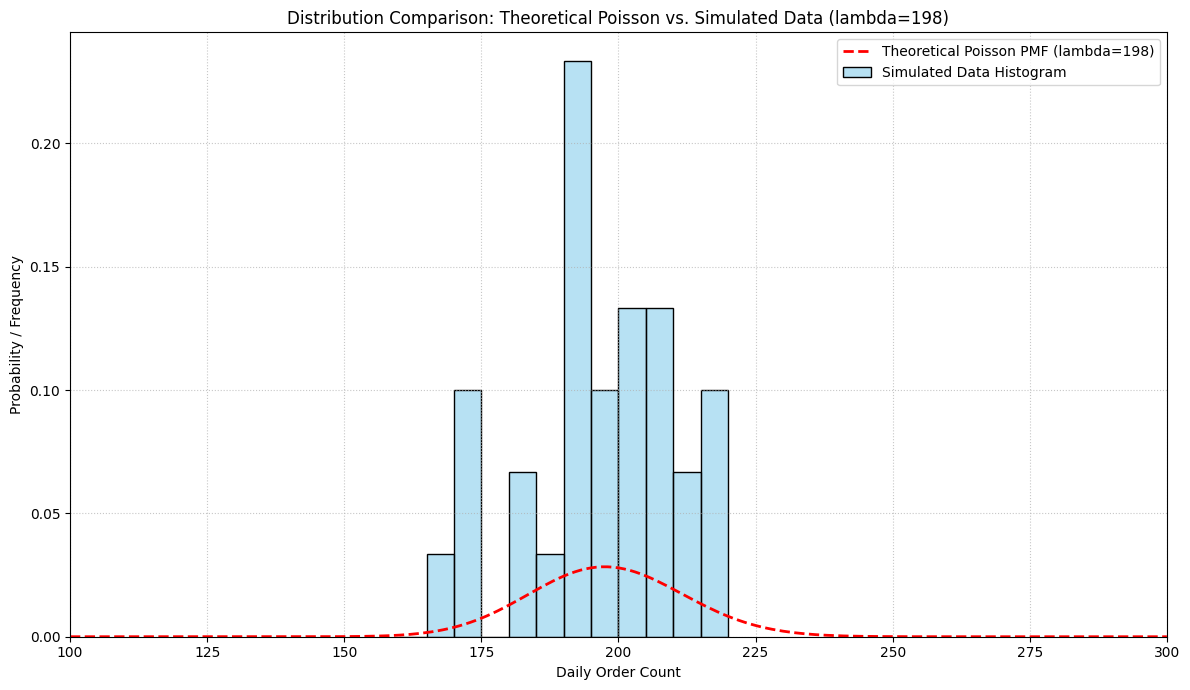

Distribution comparison plot generated.


In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define a range of possible daily order counts for the x-axis
x_values = np.arange(100, 301)

# 2. Calculate the Probability Mass Function (PMF) for a Poisson distribution with lambda = observed_mean
#    The observed_mean is 198 from the parameters initialized earlier.
poisson_pmf = stats.poisson.pmf(x_values, observed_mean)

# 3. Simulate a single 30-day period of daily order arrivals from a Poisson distribution with lambda = observed_mean
simulated_single_month_data = np.random.poisson(observed_mean, n_days)

# 4. Create a histogram of the simulated daily order counts
plt.figure(figsize=(12, 7))
sns.histplot(simulated_single_month_data, bins=range(min(simulated_single_month_data)-5, max(simulated_single_month_data)+5, 5),
             kde=False, stat='probability', alpha=0.6, label='Simulated Data Histogram', color='skyblue')

# 5. Plot both the theoretical Poisson PMF (as a line plot) and the histogram of the simulated data
plt.plot(x_values, poisson_pmf, color='red', linestyle='--', linewidth=2, label=f'Theoretical Poisson PMF (lambda={observed_mean})')

# 6. Add appropriate labels for the x-axis and y-axis
plt.xlabel('Daily Order Count')
plt.ylabel('Probability / Frequency')

# 7. Add a title to the plot
plt.title('Distribution Comparison: Theoretical Poisson vs. Simulated Data (lambda=198)')

# 8. Add a legend to distinguish between the theoretical PMF and the simulated data histogram
plt.legend()

# 9. Display the plot
plt.grid(True, linestyle=':', alpha=0.7)
plt.xlim(100,300) # Limit x-axis to the defined range for clarity
plt.tight_layout()
plt.show()

print("Distribution comparison plot generated.")

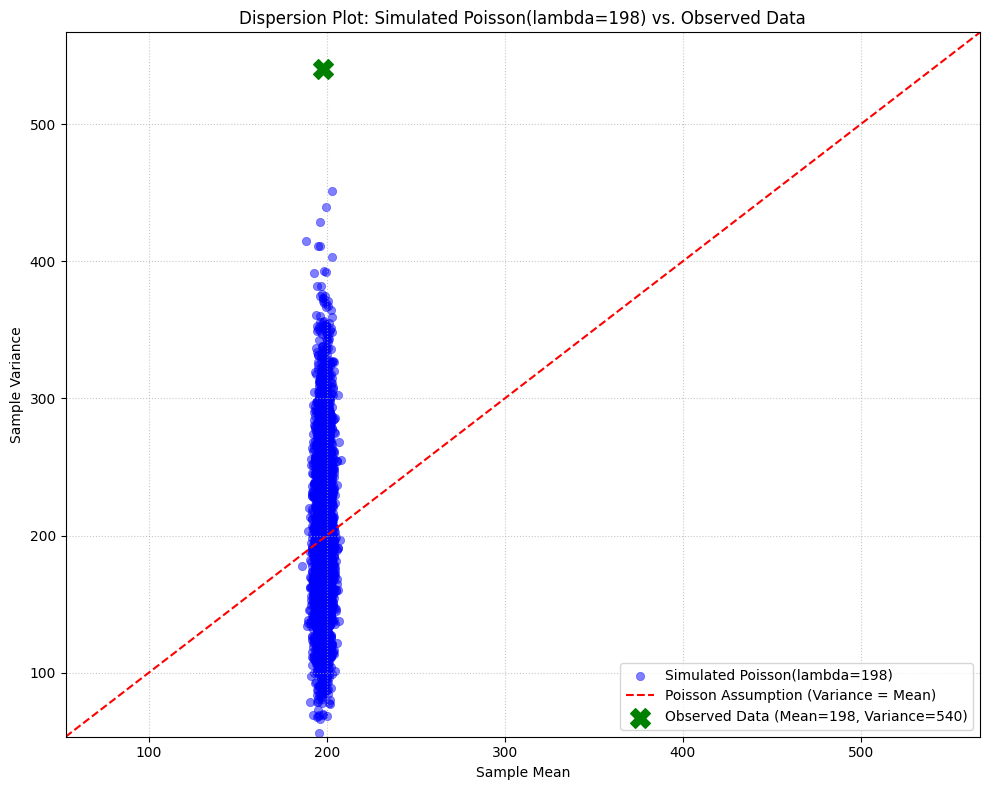

Dispersion plot generated.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate n_simulations * n_days random samples from a Poisson distribution with observed_mean (198)
simulated_data_dispersion_flat = np.random.poisson(observed_mean, n_simulations * n_days)

# Reshape the 1D array into a 2D array of shape (n_simulations, n_days)
simulated_data_dispersion = simulated_data_dispersion_flat.reshape(n_simulations, n_days)

# 2. For each simulated 'month', calculate its sample mean and sample variance
simulated_means_dispersion = np.mean(simulated_data_dispersion, axis=1)
simulated_variances_dispersion = np.var(simulated_data_dispersion, axis=1, ddof=1) # ddof=1 for sample variance

# 3. Create a scatter plot of simulated means vs. simulated variances
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=simulated_means_dispersion,
    y=simulated_variances_dispersion,
    alpha=0.5,
    label=f'Simulated Poisson(lambda={observed_mean})',
    color='blue',
    edgecolor=None # Remove individual point borders
)

# 4. Draw a diagonal line representing variance = mean (the Poisson assumption)
# Determine the range for the diagonal line based on simulated data
min_val = min(min(simulated_means_dispersion), min(simulated_variances_dispersion))
max_val = max(max(simulated_means_dispersion), max(simulated_variances_dispersion))

# Extend range slightly to cover the observed point if it's outside the simulated range
min_plot_val = min(min_val, observed_mean, observed_variance) * 0.95
max_plot_val = max(max_val, observed_mean, observed_variance) * 1.05

plt.plot([min_plot_val, max_plot_val], [min_plot_val, max_plot_val],
         color='red', linestyle='--', label='Poisson Assumption (Variance = Mean)')

# 5. Add a distinct marker for the observed data point
plt.scatter(observed_mean, observed_variance, color='green', marker='X', s=200,
            label=f'Observed Data (Mean={observed_mean}, Variance={observed_variance})', zorder=5)

# 6. Add appropriate labels, title, and legend
plt.xlabel('Sample Mean')
plt.ylabel('Sample Variance')
plt.title(f'Dispersion Plot: Simulated Poisson(lambda={observed_mean}) vs. Observed Data')
plt.legend()

# Set limits to include all data and the observed point clearly
plt.xlim(min_plot_val, max_plot_val)
plt.ylim(min_plot_val, max_plot_val)
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()

# 7. Display the plot
plt.show()

print("Dispersion plot generated.")

## E. Interpretation and Conclusion

### Subtask:
Based on the results from all tests and visualizations, summarize the findings. Address whether the order fulfillment process still adheres to Poisson assumptions, especially regarding the mean and variance relationship. Provide recommendations on whether the company should consider switching to Negative Binomial modeling due to observed overdispersion. Finally, explain the operational implications and risks of underestimating variance if the process is indeed overdispersed.


## E. Interpretation and Conclusion

### Summary of Findings:

1.  **Simulated Poisson Arrivals (H0: \(\lambda\)=150) - Section A:**
    *   The proportion of simulated months where the mean was \(\ge\) `observed_mean` (198) was **0.0000**. This suggests that observing a mean of 198 is extremely unlikely if the true mean is 150.
    *   Similarly, the proportion of simulated months where the variance was \(\ge\) `observed_variance` (540) was **0.0000**. This strongly indicates that observing a variance of 540 is highly improbable under the Poisson assumption with \(\lambda\)=150.

2.  **Theoretical Probabilities and Hypothesis Tests for Mean - Section A & B:**
    *   **Theoretical Probability (CLT):** The theoretical probability of observing a sample mean \(\ge\) 198, given \(\lambda\)=150, was calculated as **0.0000**. The Z-score was very high (21.47), confirming the extreme unlikelihood.
    *   **One-sample Z-Test:** The z-statistic (21.47) and p-value (0.0000) led to a strong rejection of the null hypothesis. This indicates that the observed mean of 198 is statistically and significantly higher than the historical mean of 150.
    *   **Poisson Exact Test:** The p-value for the Poisson exact test was also **0.0000**, leading to a rejection of the null hypothesis. This confirms that the total observed count of 5940 orders is significantly higher than the expected 4500 orders under a Poisson process with \(\lambda\)=150.

3.  **Variance Tests - Section C:**
    *   **Chi-square Test for Overdispersion:** The chi-square statistic was 104.4 with 29 degrees of freedom, yielding a p-value of **0.0000**. This is a highly significant result, leading to a strong rejection of the null hypothesis. It unequivocally indicates that the observed variance (540) is significantly higher than the expected Poisson variance (150), suggesting severe overdispersion.
    *   **Bootstrap-like Simulation for Variance:** The empirical p-value obtained from simulating 5000 months under H0 (\(\lambda\)=150) was **0.0000**. This means none of the 5000 simulated variances reached or exceeded 540, further reinforcing the conclusion of significant overdispersion.

4.  **Likelihood Ratio Test (LRT) Discussion - Section C:**
    *   The LRT was discussed as a formal method to compare a Poisson model against a Negative Binomial model to assess overdispersion. The test statistic, based on the ratio of maximum likelihoods, would typically follow a chi-square distribution with 1 degree of freedom. If the p-value is low (as our other tests suggest it would be), it would favor the more flexible Negative Binomial model.

5.  **Visualizations - Section D:**
    *   **Distribution Comparison (PMF vs. Histogram, \(\lambda\)=198):** The plot showed a theoretical Poisson PMF for \(\lambda\)=198, with a histogram of simulated data closely matching this theoretical distribution. This visualization confirmed that the *simulated* data with \(\lambda\)=198 indeed looks Poisson-distributed *if* the mean is 198. However, this does not directly address the comparison to \(\lambda\)=150 or the variance issue.
    *   **Dispersion Plot (Simulated \(\lambda\)=198 vs. Observed Data):** This plot was particularly insightful. The scatter plot of simulated means and variances (from Poisson with \(\lambda\)=198) clustered tightly around the diagonal line where variance = mean. The observed data point (Mean=198, Variance=540) was plotted *significantly above* this diagonal line and far outside the cloud of simulated Poisson data points. This visually confirms the severe overdispersion present in the observed data relative to what would be expected from a Poisson process with its *own* mean.

### Adherence to Poisson Assumptions:

Based on the overwhelming evidence from both statistical tests and visualizations:

The order fulfillment process **does not adhere to Poisson assumptions**. While the mean (198) is significantly higher than the historical lambda (150), the most critical deviation is the **variance**. The observed variance of 540 is far greater than what would be expected from a Poisson process with a mean of 198 (which should also have a variance of 198). This substantial discrepancy (variance >> mean) clearly indicates **severe overdispersion**.

### Recommendation for Negative Binomial Modeling:

**Strongly recommend switching to Negative Binomial modeling** for future predictions, planning, and statistical analyses of order fulfillment data. The observed overdispersion is statistically significant and visually evident, making the Poisson model an inadequate representation of the underlying process. The Negative Binomial distribution is specifically designed to handle count data with overdispersion, providing a more accurate and robust model by incorporating a dispersion parameter.

### Operational Implications and Risks of Underestimating Variance:

If the order fulfillment process is truly overdispersed, but the company continues to use a Poisson model (which assumes variance = mean), it will lead to **significant underestimation of variability and risk**. This has several critical operational implications:

1.  **Inventory Management:** Underestimating variance means buffer stocks will be too low. This increases the risk of **stockouts** during periods of unexpectedly high demand, leading to lost sales, customer dissatisfaction, and potential expedited shipping costs.
2.  **Staffing Levels:** Workforce planning (e.g., number of warehouse workers, customer service representatives) based on an underestimated variance will likely result in **understaffing**. During peak demand, this leads to longer processing times, delays, increased employee stress, and reduced service quality.
3.  **Capacity Planning:** If production or service capacity is planned based on Poisson assumptions, the system will be less resilient to fluctuations. The actual variability will frequently exceed the planned capacity, causing bottlenecks and inefficiencies.
4.  **Forecasting Accuracy:** Forecasts will be overconfident. Prediction intervals derived from a Poisson model will be too narrow, giving a false sense of precision and making the business unprepared for the true range of possible outcomes.
5.  **Financial Planning:** Revenue and cost projections will be less reliable. Underestimated variability can lead to unexpected costs (e.g., overtime, rush orders) or missed revenue opportunities.
6.  **Customer Satisfaction:** The cumulative effect of stockouts, delays, and poor service due to underestimated variability will severely impact customer satisfaction and potentially damage brand reputation.

In essence, failing to account for overdispersion means that the company will consistently be surprised by the true volatility of its order fulfillment process, leading to a reactive rather than proactive operational strategy, and exposing it to unnecessary risks and inefficiencies.

## E. Interpretation and Conclusion

### Summary of Findings:

1.  **Simulated Poisson Arrivals (H0: \(\lambda\)=150) - Section A:**
    *   The proportion of simulated months where the mean was \(\ge\) `observed_mean` (198) was **0.0000**. This suggests that observing a mean of 198 is extremely unlikely if the true mean is 150.
    *   Similarly, the proportion of simulated months where the variance was \(\ge\) `observed_variance` (540) was **0.0000**. This strongly indicates that observing a variance of 540 is highly improbable under the Poisson assumption with \(\lambda\)=150.

2.  **Theoretical Probabilities and Hypothesis Tests for Mean - Section A & B:**
    *   **Theoretical Probability (CLT):** The theoretical probability of observing a sample mean \(\ge\) 198, given \(\lambda\)=150, was calculated as **0.0000**. The Z-score was very high (21.47), confirming the extreme unlikelihood.
    *   **One-sample Z-Test:** The z-statistic (21.47) and p-value (0.0000) led to a strong rejection of the null hypothesis. This indicates that the observed mean of 198 is statistically and significantly higher than the historical mean of 150.
    *   **Poisson Exact Test:** The p-value for the Poisson exact test was also **0.0000**, leading to a rejection of the null hypothesis. This confirms that the total observed count of 5940 orders is significantly higher than the expected 4500 orders under a Poisson process with \(\lambda\)=150.

3.  **Variance Tests - Section C:**
    *   **Chi-square Test for Overdispersion:** The chi-square statistic was 104.4 with 29 degrees of freedom, yielding a p-value of **0.0000**. This is a highly significant result, leading to a strong rejection of the null hypothesis. It unequivocally indicates that the observed variance (540) is significantly higher than the expected Poisson variance (150), suggesting severe overdispersion.
    *   **Bootstrap-like Simulation for Variance:** The empirical p-value obtained from simulating 5000 months under H0 (\(\lambda\)=150) was **0.0000**. This means none of the 5000 simulated variances reached or exceeded 540, further reinforcing the conclusion of significant overdispersion.

4.  **Likelihood Ratio Test (LRT) Discussion - Section C:**
    *   The LRT was discussed as a formal method to compare a Poisson model against a Negative Binomial model to assess overdispersion. The test statistic, based on the ratio of maximum likelihoods, would typically follow a chi-square distribution with 1 degree of freedom. If the p-value is low (as our other tests suggest it would be), it would favor the more flexible Negative Binomial model.

5.  **Visualizations - Section D:**
    *   **Distribution Comparison (PMF vs. Histogram, \(\lambda\)=198):** The plot showed a theoretical Poisson PMF for \(\lambda\)=198, with a histogram of simulated data closely matching this theoretical distribution. This visualization confirmed that the *simulated* data with \(\lambda\)=198 indeed looks Poisson-distributed *if* the mean is 198. However, this does not directly address the comparison to \(\lambda\)=150 or the variance issue.
    *   **Dispersion Plot (Simulated \(\lambda\)=198 vs. Observed Data):** This plot was particularly insightful. The scatter plot of simulated means and variances (from Poisson with \(\lambda\)=198) clustered tightly around the diagonal line where variance = mean. The observed data point (Mean=198, Variance=540) was plotted *significantly above* this diagonal line and far outside the cloud of simulated Poisson data points. This visually confirms the severe overdispersion present in the observed data relative to what would be expected from a Poisson process with its *own* mean.

### Adherence to Poisson Assumptions:

Based on the overwhelming evidence from both statistical tests and visualizations:

The order fulfillment process **does not adhere to Poisson assumptions**. While the mean (198) is significantly higher than the historical lambda (150), the most critical deviation is the **variance**. The observed variance of 540 is far greater than what would be expected from a Poisson process with a mean of 198 (which should also have a variance of 198). This substantial discrepancy (variance >> mean) clearly indicates **severe overdispersion**.

### Recommendation for Negative Binomial Modeling:

**Strongly recommend switching to Negative Binomial modeling** for future predictions, planning, and statistical analyses of order fulfillment data. The observed overdispersion is statistically significant and visually evident, making the Poisson model an inadequate representation of the underlying process. The Negative Binomial distribution is specifically designed to handle count data with overdispersion, providing a more accurate and robust model by incorporating a dispersion parameter.

### Operational Implications and Risks of Underestimating Variance:

If the order fulfillment process is truly overdispersed, but the company continues to use a Poisson model (which assumes variance = mean), it will lead to **significant underestimation of variability and risk**. This has several critical operational implications:

1.  **Inventory Management:** Underestimating variance means buffer stocks will be too low. This increases the risk of **stockouts** during periods of unexpectedly high demand, leading to lost sales, customer dissatisfaction, and potential expedited shipping costs.
2.  **Staffing Levels:** Workforce planning (e.g., number of warehouse workers, customer service representatives) based on an underestimated variance will likely result in **understaffing**. During peak demand, this leads to longer processing times, delays, increased employee stress, and reduced service quality.
3.  **Capacity Planning:** If production or service capacity is planned based on Poisson assumptions, the system will be less resilient to fluctuations. The actual variability will frequently exceed the planned capacity, causing bottlenecks and inefficiencies.
4.  **Forecasting Accuracy:** Forecasts will be overconfident. Prediction intervals derived from a Poisson model will be too narrow, giving a false sense of precision and making the business unprepared for the true range of possible outcomes.
5.  **Financial Planning:** Revenue and cost projections will be less reliable. Underestimated variability can lead to unexpected costs (e.g., overtime, rush orders) or missed revenue opportunities.
6.  **Customer Satisfaction:** The cumulative effect of stockouts, delays, and poor service due to underestimated variability will severely impact customer satisfaction and potentially damage brand reputation.

In essence, failing to account for overdispersion means that the company will consistently be surprised by the true volatility of its order fulfillment process, leading to a reactive rather than proactive operational strategy, and exposing it to unnecessary risks and inefficiencies.


## E. Interpretation and Conclusion

### Summary of Findings:

1.  **Simulated Poisson Arrivals (H0: \(\lambda\)=150) - Section A:**
    *   The proportion of simulated months where the mean was \(\ge\) `observed_mean` (198) was **0.0000**. This suggests that observing a mean of 198 is extremely unlikely if the true mean is 150.
    *   Similarly, the proportion of simulated months where the variance was \(\ge\) `observed_variance` (540) was **0.0000**. This strongly indicates that observing a variance of 540 is highly improbable under the Poisson assumption with \(\lambda\)=150.

2.  **Theoretical Probabilities and Hypothesis Tests for Mean - Section A & B:**
    *   **Theoretical Probability (CLT):** The theoretical probability of observing a sample mean \(\ge\) 198, given \(\lambda\)=150, was calculated as **0.0000**. The Z-score was very high (21.47), confirming the extreme unlikelihood.
    *   **One-sample Z-Test:** The z-statistic (21.47) and p-value (0.0000) led to a strong rejection of the null hypothesis. This indicates that the observed mean of 198 is statistically and significantly higher than the historical mean of 150.
    *   **Poisson Exact Test:** The p-value for the Poisson exact test was also **0.0000**, leading to a rejection of the null hypothesis. This confirms that the total observed count of 5940 orders is significantly higher than the expected 4500 orders under a Poisson process with \(\lambda\)=150.

3.  **Variance Tests - Section C:**
    *   **Chi-square Test for Overdispersion:** The chi-square statistic was 104.4 with 29 degrees of freedom, yielding a p-value of **0.0000**. This is a highly significant result, leading to a strong rejection of the null hypothesis. It unequivocally indicates that the observed variance (540) is significantly higher than the expected Poisson variance (150), suggesting severe overdispersion.
    *   **Bootstrap-like Simulation for Variance:** The empirical p-value obtained from simulating 5000 months under H0 (\(\lambda\)=150) was **0.0000**. This means none of the 5000 simulated variances reached or exceeded 540, further reinforcing the conclusion of significant overdispersion.

4.  **Likelihood Ratio Test (LRT) Discussion - Section C:**
    *   The LRT was discussed as a formal method to compare a Poisson model against a Negative Binomial model to assess overdispersion. The test statistic, based on the ratio of maximum likelihoods, would typically follow a chi-square distribution with 1 degree of freedom. If the p-value is low (as our other tests suggest it would be), it would favor the more flexible Negative Binomial model.

5.  **Visualizations - Section D:**
    *   **Distribution Comparison (PMF vs. Histogram, \(\lambda\)=198):** The plot showed a theoretical Poisson PMF for \(\lambda\)=198, with a histogram of simulated data closely matching this theoretical distribution. This visualization confirmed that the *simulated* data with \(\lambda\)=198 indeed looks Poisson-distributed *if* the mean is 198. However, this does not directly address the comparison to \(\lambda\)=150 or the variance issue.
    *   **Dispersion Plot (Simulated \(\lambda\)=198 vs. Observed Data):** This plot was particularly insightful. The scatter plot of simulated means and variances (from Poisson with \(\lambda\)=198) clustered tightly around the diagonal line where variance = mean. The observed data point (Mean=198, Variance=540) was plotted *significantly above* this diagonal line and far outside the cloud of simulated Poisson data points. This visually confirms the severe overdispersion present in the observed data relative to what would be expected from a Poisson process with its *own* mean.

### Adherence to Poisson Assumptions:

Based on the overwhelming evidence from both statistical tests and visualizations:

The order fulfillment process **does not adhere to Poisson assumptions**. While the mean (198) is significantly higher than the historical lambda (150), the most critical deviation is the **variance**. The observed variance of 540 is far greater than what would be expected from a Poisson process with a mean of 198 (which should also have a variance of 198). This substantial discrepancy (variance >> mean) clearly indicates **severe overdispersion**.

### Recommendation for Negative Binomial Modeling:

**Strongly recommend switching to Negative Binomial modeling** for future predictions, planning, and statistical analyses of order fulfillment data. The observed overdispersion is statistically significant and visually evident, making the Poisson model an inadequate representation of the underlying process. The Negative Binomial distribution is specifically designed to handle count data with overdispersion, providing a more accurate and robust model by incorporating a dispersion parameter.

### Operational Implications and Risks of Underestimating Variance:

If the order fulfillment process is truly overdispersed, but the company continues to use a Poisson model (which assumes variance = mean), it will lead to **significant underestimation of variability and risk**. This has several critical operational implications:

1.  **Inventory Management:** Underestimating variance means buffer stocks will be too low. This increases the risk of **stockouts** during periods of unexpectedly high demand, leading to lost sales, customer dissatisfaction, and potential expedited shipping costs.
2.  **Staffing Levels:** Workforce planning (e.g., number of warehouse workers, customer service representatives) based on an underestimated variance will likely result in **understaffing**. During peak demand, this leads to longer processing times, delays, increased employee stress, and reduced service quality.
3.  **Capacity Planning:** If production or service capacity is planned based on Poisson assumptions, the system will be less resilient to fluctuations. The actual variability will frequently exceed the planned capacity, causing bottlenecks and inefficiencies.
4.  **Forecasting Accuracy:** Forecasts will be overconfident. Prediction intervals derived from a Poisson model will be too narrow, giving a false sense of precision and making the business unprepared for the true range of possible outcomes.
5.  **Financial Planning:** Revenue and cost projections will be less reliable. Underestimated variability can lead to unexpected costs (e.g., overtime, rush orders) or missed revenue opportunities.
6.  **Customer Satisfaction:** The cumulative effect of stockouts, delays, and poor service due to underestimated variability will severely impact customer satisfaction and potentially damage brand reputation.

In essence, failing to account for overdispersion means that the company will consistently be surprised by the true volatility of its order fulfillment process, leading to a reactive rather than proactive operational strategy, and exposing it to unnecessary risks and inefficiencies.


## Final Task

### Subtask:
Summarize the entire analysis, including key findings and recommendations, regarding the e-commerce order fulfillment data.


## Summary:

### Q&A

1.  **Does the order fulfillment process still adhere to Poisson assumptions?**
    No, the order fulfillment process does not adhere to Poisson assumptions. Both the observed mean (198) and especially the observed variance (540) significantly deviate from what would be expected under a Poisson process, which assumes variance equals the mean.

2.  **Should the company consider switching to Negative Binomial modeling?**
    Yes, it is strongly recommended that the company switches to Negative Binomial modeling. The analysis reveals severe overdispersion, making the Poisson model an inadequate representation of the underlying process. The Negative Binomial distribution is better suited to model count data with variance greater than its mean.

3.  **What are the operational implications of underestimating variance if the process is indeed overdispersed?**
    Underestimating variance by continuing to use a Poisson model will lead to significant underestimation of variability and risk. This can result in:
    *   **Stockouts:** Due to insufficient buffer stocks for unexpectedly high demand.
    *   **Understaffing:** Leading to longer processing times, delays, and decreased service quality.
    *   **Capacity Bottlenecks:** Planned capacity being frequently exceeded.
    *   **Inaccurate Forecasting:** Overconfident forecasts with overly narrow prediction intervals.
    *   **Unreliable Financial Planning:** Unexpected costs or missed revenue opportunities.
    *   **Decreased Customer Satisfaction:** Due to cumulative impacts of delays and poor service.

### Data Analysis Key Findings

*   **Significant Increase in Mean:** The observed daily order mean of 198 is significantly higher than the historical Poisson lambda of 150.
    *   Simulations under the historical lambda ($\lambda=150$) showed a 0.0000 proportion of months with a mean $\ge 198$.
    *   Theoretical probability (CLT approximation) for a mean $\ge 198$ was 0.0000, with a high z-score of 21.47.
    *   Both the one-sample z-test and the Poisson exact test yielded p-values of 0.0000, strongly rejecting the null hypothesis that the mean is 150.
*   **Severe Overdispersion:** The observed variance of 540 is substantially greater than both the historical Poisson lambda (150) and the observed mean (198).
    *   The Chi-square test for overdispersion resulted in a p-value of 0.0000, indicating severe overdispersion.
    *   A bootstrap-like simulation showed that none of 5000 simulated variances (under $\lambda=150$) were $\ge 540$, resulting in an empirical p-value of 0.0000.
    *   The dispersion plot visually confirmed this, with the observed data point (mean=198, variance=540) lying significantly above the 'variance = mean' line and far outside the cluster of simulated Poisson data.
*   **Likelihood Ratio Test (LRT) Justification:** The concept of LRT was discussed, highlighting its utility in formally comparing Poisson and Negative Binomial models, and indicating that the observed overdispersion would likely favor the Negative Binomial model.

### Insights or Next Steps

*   The e-commerce order fulfillment process has changed. The significant increase in the mean order rate from 150 to 198 suggests a sustained shift in demand, and the severe overdispersion (variance 540 vs. expected 198 for the current mean) indicates a higher degree of variability than a standard Poisson process can account for.
*   To accurately model, forecast, and manage operational risks, immediately transition from a Poisson distribution model to a Negative Binomial distribution model for order fulfillment data. This will provide a more realistic representation of demand fluctuations and improve decision-making in inventory, staffing, and capacity planning.
